In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



Found GPU at: /device:GPU:0


In [ ]:
!pip install mutagen
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

# Funções

In [ ]:

import numpy as np 
import scipy as sci
import matplotlib.pyplot as plt  
import soundfile as sf
import gdown 
from gdown.download import download
from IPython.display import Audio
import os
import shutil
from zipfile import ZipFile
from time import sleep
import librosa
import zipfile
import mutagen
import mutagen.wave
import numpy as np
import pandas as pd
import librosa.display
import IPython.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
#-------------------------------------------------------------------------------
#BAIXA OS ARQ. DE AUDIO(VOICE), RUIDOS(URBANSOUND8K) E DESCOMPACTA
def baixa_arq(nome_do_arq):
    if nome_do_arq == "audios":
      target_url = 'https://drive.google.com/uc?id=1TgrkFdERLtivmP6QA3SdDKobBeIky871'#https://drive.google.com/file/d/1TgrkFdERLtivmP6QA3SdDKobBeIky871/view?usp=sharing
      gdown.download(target_url) 
      !unzip DataSet_Audio.zip
    if nome_do_arq == "ruidos":
      target_url = 'https://drive.google.com/uc?id=1ICta-FLytBIh-PQS0_OOKCTQAwPII3YU'#https://drive.google.com/file/d/1ICta-FLytBIh-PQS0_OOKCTQAwPII3YU/view?usp=sharing
      gdown.download(target_url)
      !unzip DataSet_Ruido.zip
    if nome_do_arq == 'kitchen':
      target_url = 'https://drive.google.com/uc?id=1qkDOrD5dZ8J5gbJ-uKgPsstkVud0NpIg'#
      gdown.download(target_url,"DKITCHEN-noiser.zip",quiet=False)
      !unzip DKITCHEN-noiser.zip




#-------------------------------------------------------------------------------
#PLAY AUDIO
def play(y, sr):  
  return Audio(y, rate = sr)

#-------------------------------------------------------------------------------
#MIXA OS RUIDOS E OS AUDIOS(VOICE)  
def mix_sound(audio, ruido):
  
  if len(audio) >= len(ruido):
    while len(audio) >= len(ruido):
      ruido = np.append(ruido, ruido)
 
  ind = np.random.randint(0, ruido.size - audio.size)
  ruido = ruido[ind: ind + audio.size]
  
  mix = audio + ruido
  
  return mix,ruido

#-------------------------------------------------------------------------------
#PLOTA GRAFICO DO SINAL
def plota_sound_tempo(sinal, FS):
  time = np.arange(0, len(sinal) * 1/FS, 1/FS)
  plt.title('Sinal')
  plt.ylabel('Amplitude')
  plt.xlabel('Tempo (s)')
  plt.plot(time,sinal)
  plt.grid()
  plt.show()

#-------------------------------------------------------------------------------
#PLOTA O FFT DO SINAL
def plota_fft_sound(sinal, fs, pontos):
  time = np.arange(0, len(sinal) * (1/fs), 1/fs)
  fft = np.fft.fft(sinal)
  T = time[1] - time[0]
  N = sinal.size
  f = np.fft.fftfreq(len(sinal), T)
  freq = f[:N // 2]
  ampli= np.abs(fft)[:N // 2] * 1 / N
  plt.title('FFT do Sinal')
  plt.ylabel('Amplitude')
  plt.xlabel('Frequência (Hz)')
  if pontos == None:
    plt.plot(freq, ampli)
    plt.grid()
    plt.show()
  else:
    plt.plot(freq[:pontos], ampli[:pontos])
    plt.grid()
    plt.show()

#-------------------------------------------------------------------------------
#PLOTA O ESPECTOGRAMA DO SINAL 
def plota_spec(s):
  N = 1
  pontosFFT = 256 *N
  windowLen = 256*N
  Overlap = 64*N
  window = sci.signal.windows.hamming(256*N, sym=False)

  plt.title('Espectograma do Sinal')
  plt.ylabel('Frequência (Hz)')
  plt.xlabel('Tempo (s)')
  plt.specgram(s, NFFT = pontosFFT, Fs = 8000, window = window, noverlap = 0)
  #plt.specgram(s, NFFT = 256,Fs = 8000, noverlap = 0)
  plt.show()


#-------------------------------------------------------------------------------
#CALCULA O SNR DOS SINAIS 
def snr_sinal(audio, ruido):
  v1 = np.std(audio)
  v2 = np.std(ruido)
    
  snr =  20 * np.log10(v1/v2)
  return snr

#-------------------------------------------------------------------------------
#CALCULA O ESPECTOGRAMA DO SINAL
def spec_signal(s):
  pontosFFT = 256
  windowLen = 256
  Overlap = 64
  window = sci.signal.windows.hamming(256, sym=False)

  spec = librosa.stft(s, n_fft = pontosFFT, win_length = windowLen, hop_length = Overlap, 
                       window = window, center = True)
  return spec
#-------------------------------------------------------------------------------
#CALCULA O ESPECTOGRAMA INVERSO
def inv_spec(s):
  pontosFFT = 256
  windowLen = 256
  Overlap = 64
  window = sci.signal.windows.hamming(256, sym=False)
  specInv = librosa.istft(s, hop_length=Overlap, win_length=windowLen, 
                          window=window, center=True)
  return specInv


#-------------------------------------------------------------------------------


#-------------------------------------------------------------------------------
#CALCULA E PLOTA O MEL-ESPECTOGRAMA DO SINAL
def specmel_signal(s):
  pontosFFT = 256
  windowLen = 256
  Overlap = 64
  window = sci.signal.windows.hamming(256, sym=False)

  specMel = librosa.feature.melspectrogram(y = s,sr=8000, S=s, n_fft=pontosFFT, hop_length=Overlap, win_length=windowLen, 
  window=window, pad_mode='reflect',center=True, power=2.0)

  fig, ax = plt.subplots()
  img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(specMel),ref=np.max), y_axis='log', x_axis='time', ax=ax, 
                  sr = 8000,hop_length = Overlap)
  ax.set_title('Power spectrogram')
  fig.colorbar(img, ax=ax, format="%+2.0f dB")
  plt.show()
  return specMel



#-------------------------------------------------------------------------------
#MODIFICA A FS DO SINAL PARA A FS DESEJADA(fs_output)
def resample(sinal, fs_input, fs_output):
  audioResample = []
  delay = 0.01
  n = 1
  if type(sinal) == list:    
    for i in range(len(sinal)):      
      audio_new = librosa.resample(sinal[i], orig_sr = fs_input, target_sr = fs_output)
      print('Arquivo nº',n,' resemplado')
      audioResample.append(audio_new)
      n = n + 1
  if type(sinal) == np.ndarray:
    audioResample = librosa.resample(sinal, orig_sr = fs_input, target_sr = fs_output)
    
    
  return audioResample

#-------------------------------------------------------------------------------
#GERA RUIDO GAUSSIANO COM A FUNÇÃO RANDN
def gera_ruido(amplitude, tamanho):
  return amplitude * np.random.randn(1,tamanho)

#função baixa e resampla audio

In [ ]:
def Get_Audio():
  #baixa_arq('audios')
  nome_audios = []
  nome_audios = os.listdir("/content/DataSet_Audio")
  dataset_voice = []
  new_string = "/content/DataSet_Audio/"
  n = 1
  for i in range(len(nome_audios)):
    try:
      signal, samplerate = sf.read("{}{}".format(new_string, nome_audios[i]))
      a = resample(signal, 16000, 8000) 
      dataset_voice.append(a)
      print('Arquivo numero: ',i)
      
    except:
      #print("Audio Corrompido {}: {}".format(n, nome_audios[i]))
      print("Nº Audios Errado: ", n)
      n = n + 1
      pass

  return dataset_voice

#função baixa e resample ruido

In [ ]:
def Get_Noise():
  baixa_arq('ruidos')
  nome_ruidos = []
  nome_ruidos = os.listdir("/content/DataSet_Ruido")
  dataset_noise = []
  new_string = "/content/DataSet_Ruido/"

  n = 1

  for i in range(len(nome_ruidos)):
    try:
      signal, FS = librosa.load(path = "{}{}".format(new_string, nome_ruidos[i]),sr = None, mono = True)
      a = resample(signal , FS, 8000)
      dataset_noise.append(a)
    except:
      #print("Audio Corrompido {}: {}".format(n, nome_ruidos[i]))
      print(n)
      n = n + 1
      pass
  return dataset_noise

In [ ]:
voice = Get_Audio()

Arquivo numero:  0
Arquivo numero:  1
Arquivo numero:  2
Arquivo numero:  3
Arquivo numero:  4
Arquivo numero:  5
Nº Audios Errado:  1
Arquivo numero:  7
Arquivo numero:  8
Arquivo numero:  9
Arquivo numero:  10
Arquivo numero:  11
Arquivo numero:  12
Arquivo numero:  13
Arquivo numero:  14
Arquivo numero:  15
Arquivo numero:  16
Arquivo numero:  17
Arquivo numero:  18
Arquivo numero:  19
Arquivo numero:  20
Arquivo numero:  21
Arquivo numero:  22
Arquivo numero:  23
Arquivo numero:  24
Arquivo numero:  25
Arquivo numero:  26
Arquivo numero:  27
Arquivo numero:  28
Arquivo numero:  29
Arquivo numero:  30
Arquivo numero:  31
Arquivo numero:  32
Arquivo numero:  33
Arquivo numero:  34
Arquivo numero:  35
Arquivo numero:  36
Arquivo numero:  37
Arquivo numero:  38
Arquivo numero:  39
Arquivo numero:  40
Arquivo numero:  41
Arquivo numero:  42
Arquivo numero:  43
Arquivo numero:  44
Arquivo numero:  45
Arquivo numero:  46
Arquivo numero:  47
Arquivo numero:  48
Arquivo numero:  49
Arquivo 

In [ ]:
specVoice = []
for i in range(4300):
  a = spec_signal(voice[i])
  specVoice.append(a)

In [ ]:
noise = Get_Noise()

In [ ]:
Noiset = noise

In [ ]:
play(Noiset[400], 8000)

In [ ]:

DataSetMix = []
DataSetRuidoSegment = []
for i in range(4301):
  v, r = mix_sound(voice[i], Noiset[i])
  DataSetMix.append(v)
  DataSetRuidoSegment.append(r)

In [ ]:
n = 87
play(DataSetMix[n],8000)

In [ ]:
play(voice[n],8000)

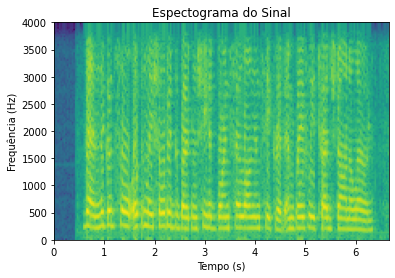

In [ ]:
plota_spec(voice[n])

In [ ]:
specAudio = spec_signal(voice[n])

In [ ]:
specRuido = spec_signal(DataSetRuidoSegment[n])

In [ ]:
specMix = spec_signal(DataSetMix[n])

In [ ]:
play(DataSetRuidoSegment[n], 8000)

In [ ]:
SNR = snr_sinal(voice[n], DataSetRuidoSegment[n])

In [ ]:
v1 = []

v1 = librosa.amplitude_to_db(np.abs(specAudio),ref=np.max) 
MaskSpec = v1
FC = SNR + 5
for j in range(129):
  i=0
  for i in range(len(specAudio[0])):
    RSR =  20*np.log10(specAudio[j,i] / specRuido[j, i])  
    if RSR >= FC:
      MaskSpec[j][i] = 1
    if RSR < FC:
      MaskSpec[j][i] = 0

In [ ]:
specMixmask = []

specMixmask = MaskSpec * specMix

In [ ]:

MixMask = inv_spec(specMixmask)

In [ ]:
play(MixMask, 8000)

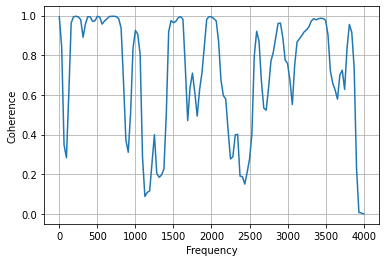

In [ ]:
Cxy, x = plt.cohere(voice[n],DataSetMix[n], Fs = 8000)

#mais de um ruido

In [ ]:
play(mix[1],8000)

In [ ]:
vv , rr = mix_sound(mix[1],Noiset[1000])

In [ ]:
specMix = spec_signal(vv)

In [ ]:
Ruido = rr + RuidoSegment[1]
specRuido = spec_signal(Ruido)

In [ ]:
specAudio = spec_signal(voice[1])

In [ ]:
snr_sinal(voice[1],Ruido)

-15.525280712334478

In [ ]:
v1 = []

v1 = librosa.amplitude_to_db(np.abs(specAudio),ref=np.max) 
MaskSpec = v1


for j in range(129):
  i=0
  for i in range(878):
    a =  20*np.log10(specAudio[j,i] / specRuido[j, i])  

    if a >= 5:
      MaskSpec[j][i] = 1
    if a < 5:
      MaskSpec[j][i] = 0

In [ ]:
specMixmask = []

specMixmask = MaskSpec * specMix

In [ ]:
pontosFFT = 256
windowLen = 256
Overlap = 64
window = sci.signal.windows.hamming(256, sym=False)

MixMask = librosa.istft(specMixmask, hop_length=Overlap, win_length=windowLen, window=window, center=True)

In [ ]:
play(MixMask, 8000)

#AUDIOS

In [ ]:

vtr = Get_featAudio(voice)

In [ ]:
specAudioTrain = []
n = 1
for i in range(3655):
  sleep(0.1)
  a = spec_signal(vtr[i])
  specAudioTrain.append(a)
  print(n)
  n = n + 1

#função feature ruido

In [ ]:
def Get_featRuido():
  baixa_arq("ruidos")
  nome_ruidos = []
  nome_ruidos = os.listdir("/content/DataSet_Ruido")
  fs = []
  fsUrban = []
  dataset_noise = []
  RuidoTest = []
  RuidoTrain = []
  path = "/content/DataSet_Ruido/"
#Le arquivos os arquivos: 
  n = 1
  for i in range(len(nome_ruidos)):
    sleep(0.1) 
    try:
      s, fs = librosa.load(path = "{}{}".format(path, nome_ruidos[i]), sr = None, mono = True)
      dataset_noise.append(s)
      fsUrban.append(fs)
    except:
      print("Nº Ruido Errado: ", n)
      n = n + 1
  n=0

  sleep(25)
#Dawn-Sample todos os arquivos para 8kHz
  for i in range(len(fs)):
    sleep(0.1)
    a = resample(dataset_noise[i], fs[i], 8000)
    dataset_noise.append(a)

#Separa o dataset em Traino(3655) e Test(645)
  RuidoTest = dataset_noise[:645]
  RuidoTrain = dataset_noise[645:4300]

#Calcula o Espectograma
  sleep(30)
  print('Calculando Espectograma....')
  #TREINO
  specNoiseTr = []
  for i in range(len(RuidoTrain)):
    sleep(0.1)
    a = spec_signal(RuidoTrain[i])
    specNoiseTr.append(a)
    print("espectogramaTreino = ", n)
    n = n + 1
  sleep(30)
  n=0
  #TEST
  specNoiseTt = []
  for i in range(len(RuidoTest)):
    sleep(0.1)
    a = spec_signal(RuidoTest[i])
    specNoiseTt.append(a)
    print("espectogramaTest = ", n)
    n = n + 1
  n = 0

  return dataset_noise, RuidoTest, RuidoTrain, specNoiseTr, specNoiseTt

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [ ]:
vte = resample(vte,16000, 8000)

In [ ]:
specAudioTr = []

for i in range(len(vtr)):
  a = spec_signal(vtr[i])
  specAudioTr.append(a)


In [ ]:
  specAudioTt = []
  for i in range(len(vte)):
    a = spec_signal(vte[i])
    specAudioTt.append(a)

In [ ]:
b = specAudioTr[22]

In [ ]:
a = inv_spec(b)

In [ ]:
play(a, 8000)

In [ ]:
play(vtr[22],8000)

In [ ]:
nome_audios = []
nome_audios = os.listdir("/content/DataSet_Audio")
dataset_voice = []

new_string = "/content/DataSet_Audio/"

n = 1

for i in range(len(nome_audios)):
  try:
    signal, samplerate = sf.read("{}{}".format(new_string, nome_audios[i]))
    dataset_voice.append(signal)
  except:
    print("Audio Corrompido {}: {}".format(n, nome_audios[i]))
    n = n + 1
    pass

del n,i,new_string, samplerate,signal,nome_audios

In [ ]:




ds_AudioTrain = []
ds_AudioTest = []

ds_AudioTest = dataset_voice[:645]
ds_AudioTrain = dataset_voice[645:4300]





In [ ]:
dataset_voice = resample(dataset_voice,16000,8000)

In [ ]:
play(dataset_voice[3998],8000)

#separando o audio

In [ ]:
A1 = dataset_voice[:1000]
A2 = dataset_voice[1000:2000]
A3 = dataset_voice[3000:4000]
A4 = dataset_voice[4000:]

In [ ]:
A2 = resample(A2,16000,8000)

In [ ]:
A1 = resample(A1, 16000, 8000)

In [ ]:
A3 = resample(A3, 16000, 8000)

In [ ]:
A4 = resample(A4, 16000, 8000)

In [ ]:
play(A1[999], 8000)

#dstest

#dstrain

In [ ]:
ds_AudioTrain = resample(ds_AudioTrain, 16000, 8000)

In [ ]:
play(ds_AudioTrain[10],8000)

#especTrain

In [ ]:
specAudioTrain = []

for i in range(len(ds_AudioTrain)):
  a = spec_signal(ds_AudioTrain[i])
  specAudioTrain.append(a)

In [ ]:
specAudio1 = []

for i in range(len(A1)):
  a = spec_signal(A1[i])
  specAudio1.append(a)

 

In [ ]:
specAudio2 = []

for i in range(len(A2)):
  a = spec_signal(A2[i])
  specAudio2.append(a)

In [ ]:
specAudio3 = []

for i in range(len(A3)):
  a = spec_signal(A3[i])
  specAudio3.append(a)

In [ ]:
specAudio4 = []

for i in range(len(A4)):
  a = spec_signal(A4[i])
  specAudio4.append(a)

#specTest

In [ ]:
specAudioTest = []

for i in range(len(ds_AudioTest)):
  a = spec_signal(ds_AudioTest[i])
  specAudioTest.append(a)

#tornando tupla

In [ ]:
specAudioTest = tuple(specAudioTest)

In [ ]:
specAudioTrain = tuple(specAudioTrain)

#RUIDOS

In [ ]:
baixa_arq("ruidos")

In [ ]:
nome_ruidos = []
nome_ruidos = os.listdir("/content/DataSet_Ruido")
dataset_noise = []
fs = []
new_string = "/content/DataSet_Ruido/"

n = 1

for i in range(len(nome_ruidos)):
  try:
    signal, FS = sf.read("{}{}".format(new_string, nome_ruidos[i]))
    dataset_noise.append(signal)
    fs.append(FS)
  except:
    #print("Audio Corrompido {}: {}".format(n, nome_ruidos[i]))
    print(n)
    n = n + 1
    pass

del n,i,new_string, samplerate,signal,nome_ruidos

In [ ]:
del FS